

```
# This is formatted as code
```

#**CardioGoodFitness**

#About Dataset:

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.


The team identifies the following customer variables to study:

 - product purchased, TM195, TM498, or TM798;
 - gender;
 - age, in years;
 - education, in years;
 - relationship status, single or partnered;
 - annual household income ($);
 - average number of times the customer plans to use the treadmill each week;
 - average number of miles the customer expects to walk/run each week;
 - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

###Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

##Dataset Information :
###cardiogoodfitness.csv: The csv contains data related to customers who have purchased different model from Cardio Good Fitness :
-	Product - the model no. of the treadmill
-	Age - in no of years, of the customer
-	Gender - of the customer
-	Education - in no. of years, of the customer
-	Marital Status - of the customer
-	Usage - Avg. # times the customer wants to use the treadmill every week
-	Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
-	Income - of the customer
-	Miles- expected to run
###Objective
-	Come up with a customer profile (characteristics of a customer) of the different products
-	Based on the data we have to generate a set of insights and recommendations that will help the company in targetting new customers



### Use EDA to answer following:

- How many models does store have?
- Which is most sold Model?
- Are Male customers buying treadmill more than female customers?
- What is the Income ,Age , Education of people buying treadmill.?
- How many days and miles customer expect to run on treadmill?
- What is the self rated fitness of customers buying treadmill.?
- Are married customer buying Treadmill more than Single customers?
- Is there any relation between Income and model.?
- Is there any relation between Age and model ?
- Is there any relation between self rated fitness and model .?
- Is there any relation between education and model.?
- Does gender has any effect on model customer buy .?
- Does Martial status has any effect model customer buy.?
- Is there different age groups buying different models.?
- Relation between Age, Income and education and model bought ?

In [52]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1.UNDERSTAND THE DATA

####Reading the csv file cardiogoodfitness.csv in variable


In [54]:
data=pd.read_csv("/content/drive/MyDrive/0.Latest_DS_Course/Statistics/Descriptive/8.EDA/data/CardioGoodFitness.csv")
dffitness=data.copy()

####Examine the data by looking at the first 5 rows of the data


In [55]:
dffitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [56]:
dffitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [57]:
dffitness.shape

(180, 9)

In [58]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [59]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [60]:
dffitness.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


##2.DATA CLEANING

In [61]:
#Check for null values:
dffitness.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [62]:
#Check for duplicates
dffitness.duplicated().sum()

0

In [63]:
#Data Type Correction

dffitness.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [64]:
#changing it to  object dtype to category  to save memory
dffitness.Product=dffitness["Product"].astype("category")
dffitness.Gender=dffitness["Gender"].astype("category")
dffitness.MaritalStatus=dffitness["MaritalStatus"].astype("category")


In [65]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


##UNIVARIATE ANALYSIS - NUMERICAL COLUMNS

In [66]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [67]:
# easiest way to get your numerical columns however its not advisable when you have 200 cols
all_numerical_cols_data = dffitness[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]

In [68]:
all_numerical_cols_data

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [69]:
# Exclude categorical columns
numerical_data = dffitness.select_dtypes(include=[np.number])
numerical_data.columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

In [70]:
# Summary Statistics
numerical_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Numerical columns:Distribution Plots

 -  data['numerical_column'].plot.hist(),
 - sns.histplot(data['numerical_column'], kde=True),
 - data['numerical_column'].plot.box(),
 - sns.kdeplot(data['numerical_column'])

In [71]:
numerical_data.columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

####Different Ways of doing Hist plot

<Axes: ylabel='Frequency'>

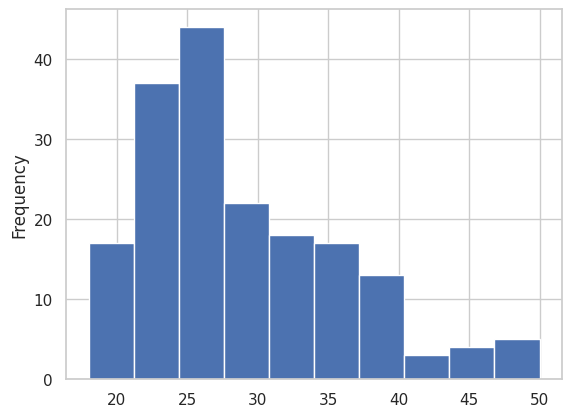

In [72]:
numerical_data['Age'].plot.hist()

<Axes: xlabel='Age', ylabel='Count'>

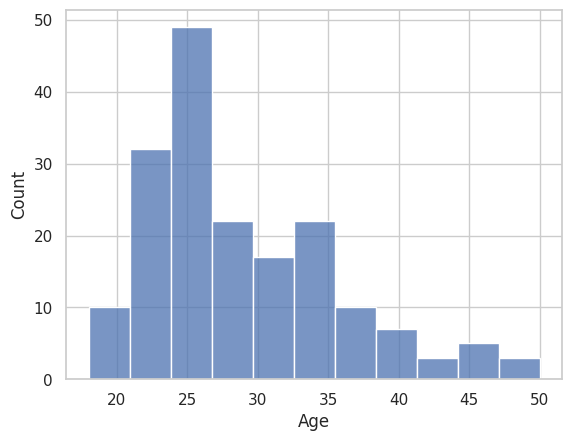

In [73]:
sns.histplot(data=numerical_data, x='Age')

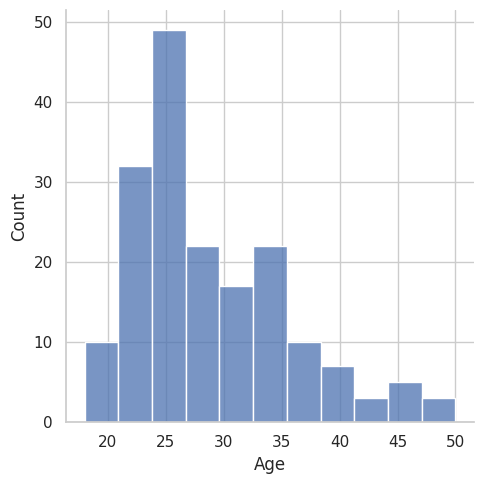

In [74]:
sns.displot(data=numerical_data['Age'])

###Different ways of doing box plot

<Axes: >

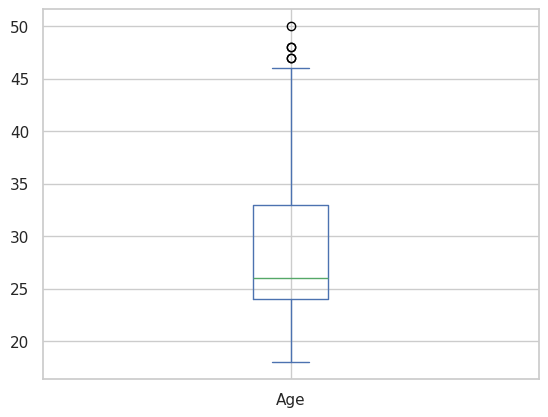

In [75]:
numerical_data['Age'].plot.box()

<Axes: xlabel='Age'>

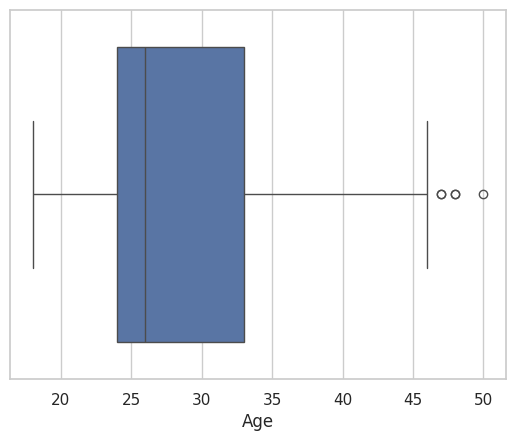

In [76]:
sns.boxplot(data=numerical_data['Age'],orient='h')

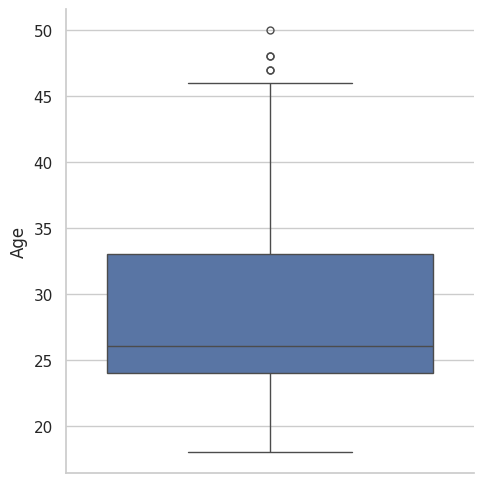

In [77]:
sns.catplot(data=numerical_data['Age'], kind='box')

###Different Ways of doing KDE plot

<Axes: xlabel='Age', ylabel='Density'>

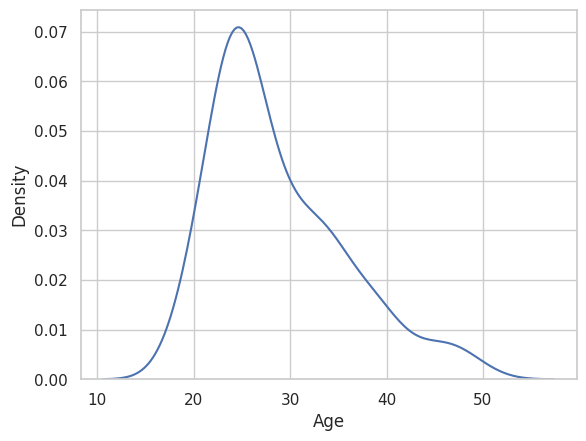

In [78]:
sns.kdeplot(data=numerical_data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

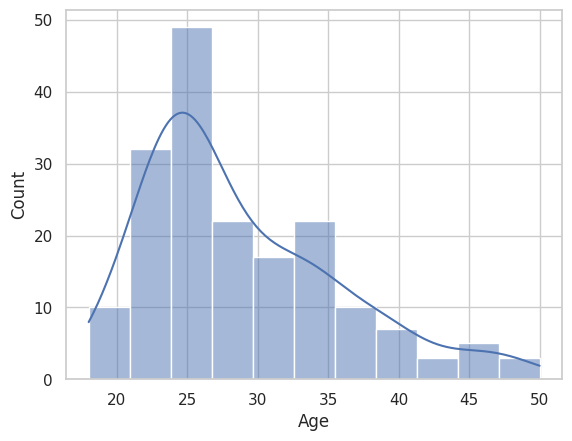

In [79]:
sns.histplot(data=numerical_data['Age'] ,kde=True)

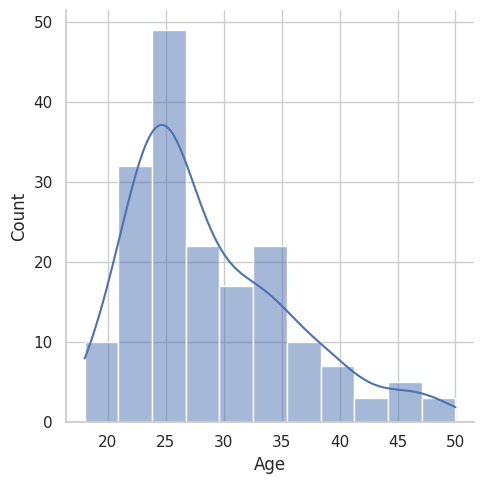

In [80]:
sns.displot(data=numerical_data['Age'], kde=True)

###Common Method for Univariate Analysis - Numerical

In [81]:
def univariate_numerical(data):
  fig, axes = plt.subplots(3, 1, figsize=(10, 15))
  sns.histplot(data=data,ax=axes[0])
  sns.boxplot(data=data,orient='h',ax=axes[1])
  sns.kdeplot(data=data,ax=axes[2])

In [82]:
numerical_data.columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

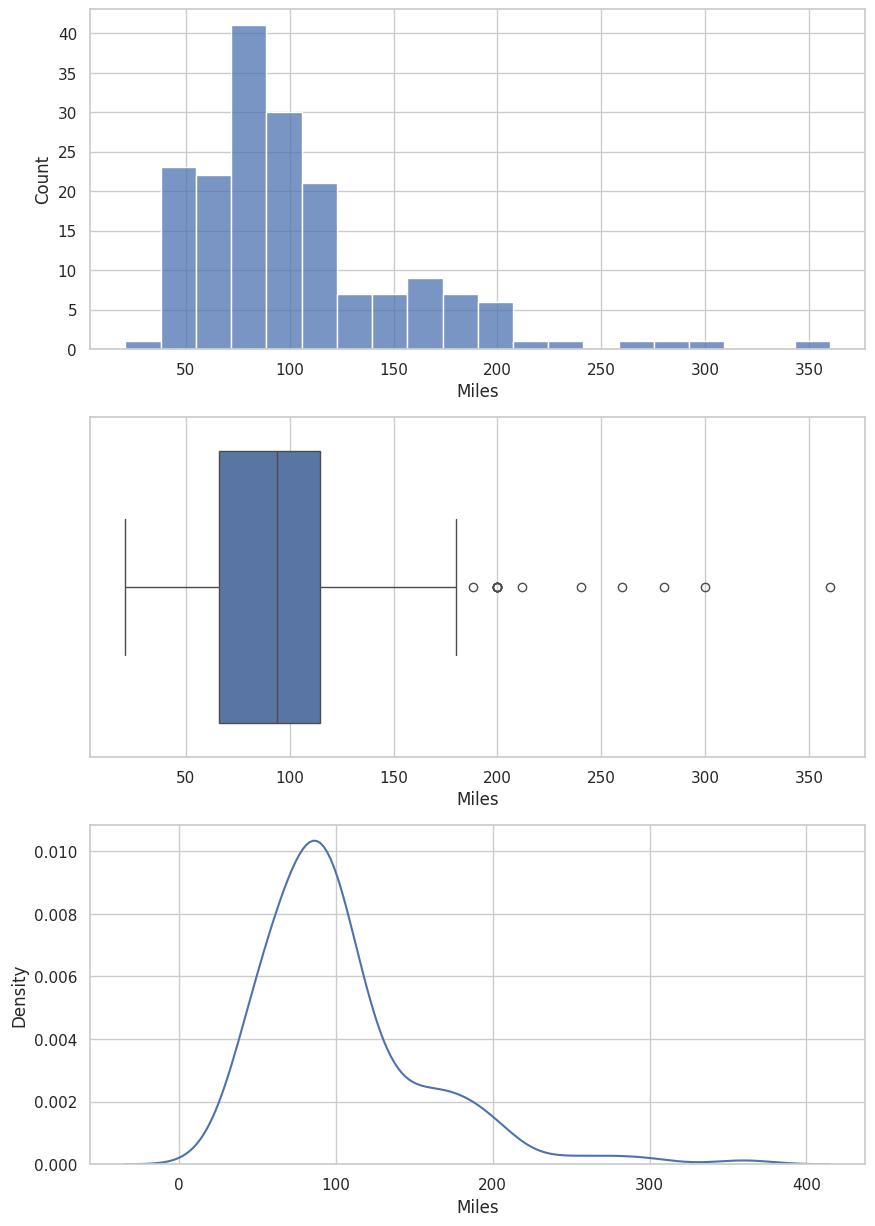

In [83]:
univariate_numerical(dffitness['Miles'])

##UNIVARIATE ANALYSIS - CATEGORICAL COLUMN


In [84]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [85]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [86]:
# Extract categorical columns
categorical_data = dffitness.select_dtypes(include=['object', 'category'])
display(categorical_data)

,Product,Gender,MaritalStatus
0,TM195,Male,Single
1,TM195,Male,Single
2,TM195,Female,Partnered
3,TM195,Male,Single
4,TM195,Male,Partnered
...,...,...,...
175,TM798,Male,Single
176,TM798,Male,Single
177,TM798,Male,Single
178,TM798,Male,Partnered


In [87]:
dffitness.shape

(180, 9)

In [88]:
# These are the categorical columns
categorical_data.columns

Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')

####Categorical columns - Univariate plots (count plots):
 -  data['categorical_column'].value_counts().plot.bar(),
 -  sns.countplot(x='categorical_column', data=data)

###Different Ways of doing a count plot

<Axes: xlabel='Product'>

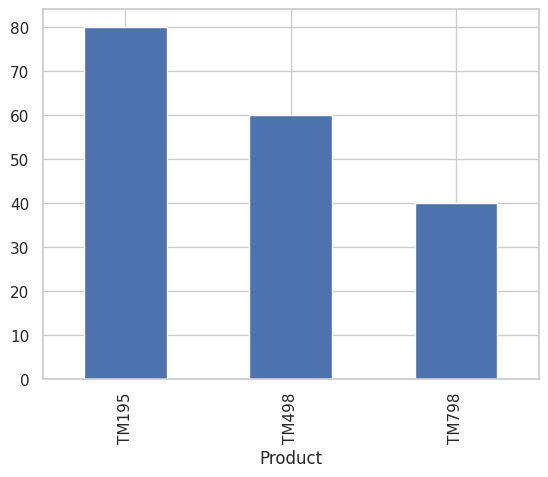

In [89]:
dffitness['Product'].value_counts().plot.bar()

<Axes: xlabel='Product', ylabel='count'>

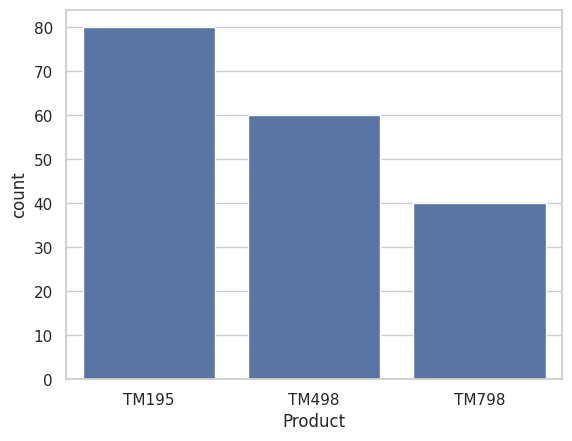

In [90]:
sns.countplot(data=dffitness, x='Product')

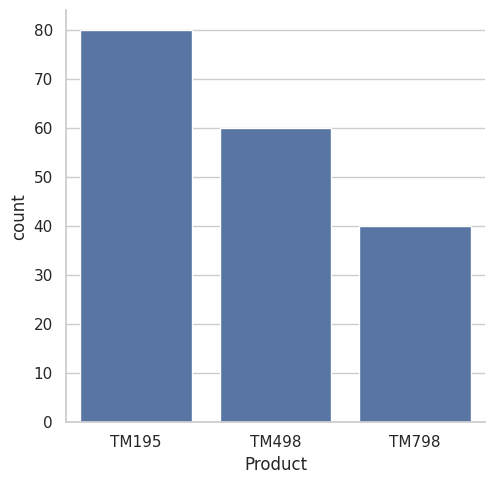

In [91]:
sns.catplot(data=dffitness, x='Product',kind='count')

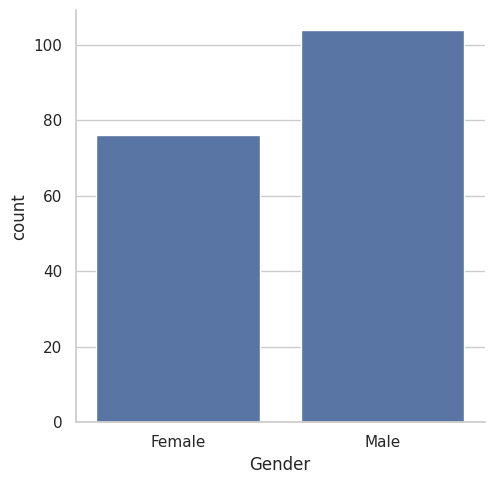

In [92]:
sns.catplot(data=dffitness, x='Gender',kind='count')

##BIVARIATE ANALYSIS

###Correlation (only for numerical columns):
data.corr(), sns.heatmap(data.corr(), annot=True)

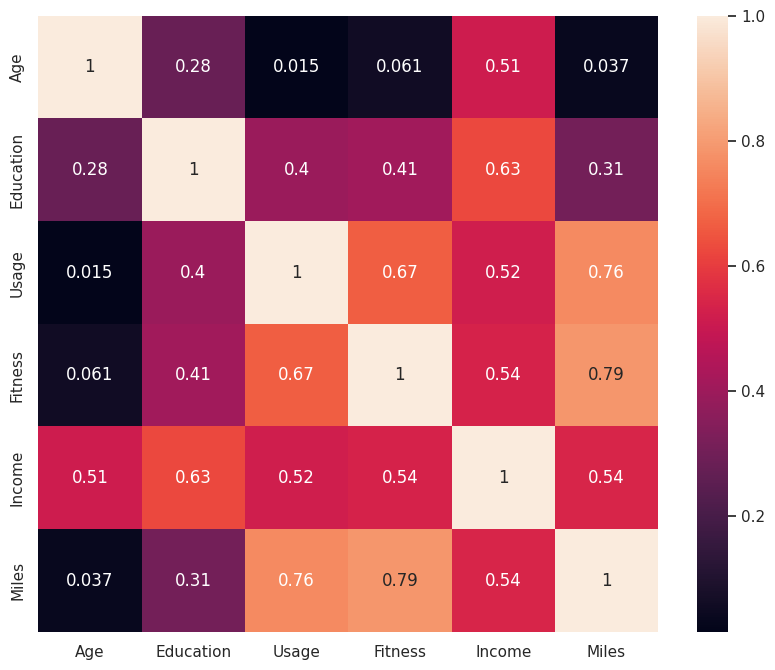

In [93]:

# Exclude categorical columns
numerical_data = dffitness.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [94]:
numerical_data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


###Scatter Plots:
 - Numerical vs. Numerical: data.plot.scatter(x='numerical_column1', y='numerical_column2'), sns.scatterplot(x='numerical_column1', y='numerical_column2', data=data)
 - Numerical vs. Categorical: sns.boxplot(x='categorical_column', y='numerical_column', data=data)

In [95]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<Axes: xlabel='Income', ylabel='Usage'>

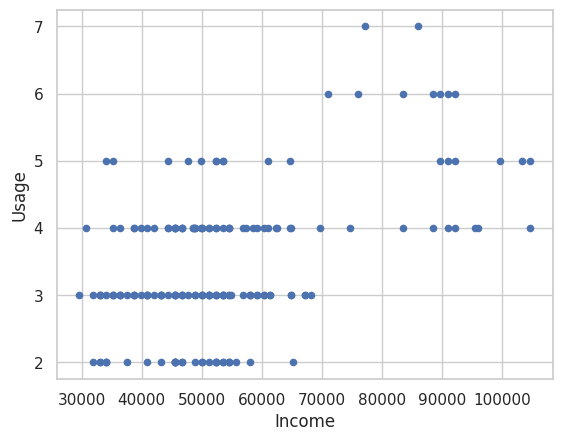

In [96]:
dffitness.plot.scatter(x='Income',y='Usage')

<Axes: xlabel='Product', ylabel='Income'>

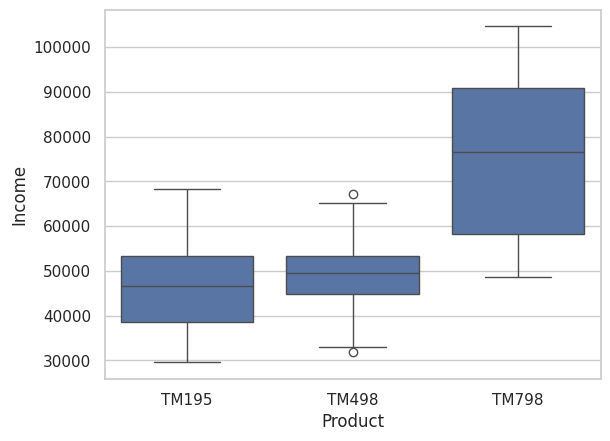

In [97]:
sns.boxplot(data=dffitness, x='Product', y="Income")

<Axes: xlabel='Gender', ylabel='Income'>

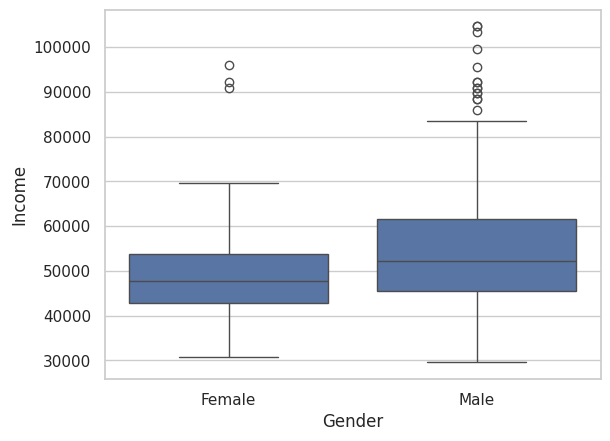

In [98]:
sns.boxplot(data=dffitness, x='Gender', y="Income")

##MULTIVARIATE ANALYSIS

<Figure size 1500x700 with 0 Axes>

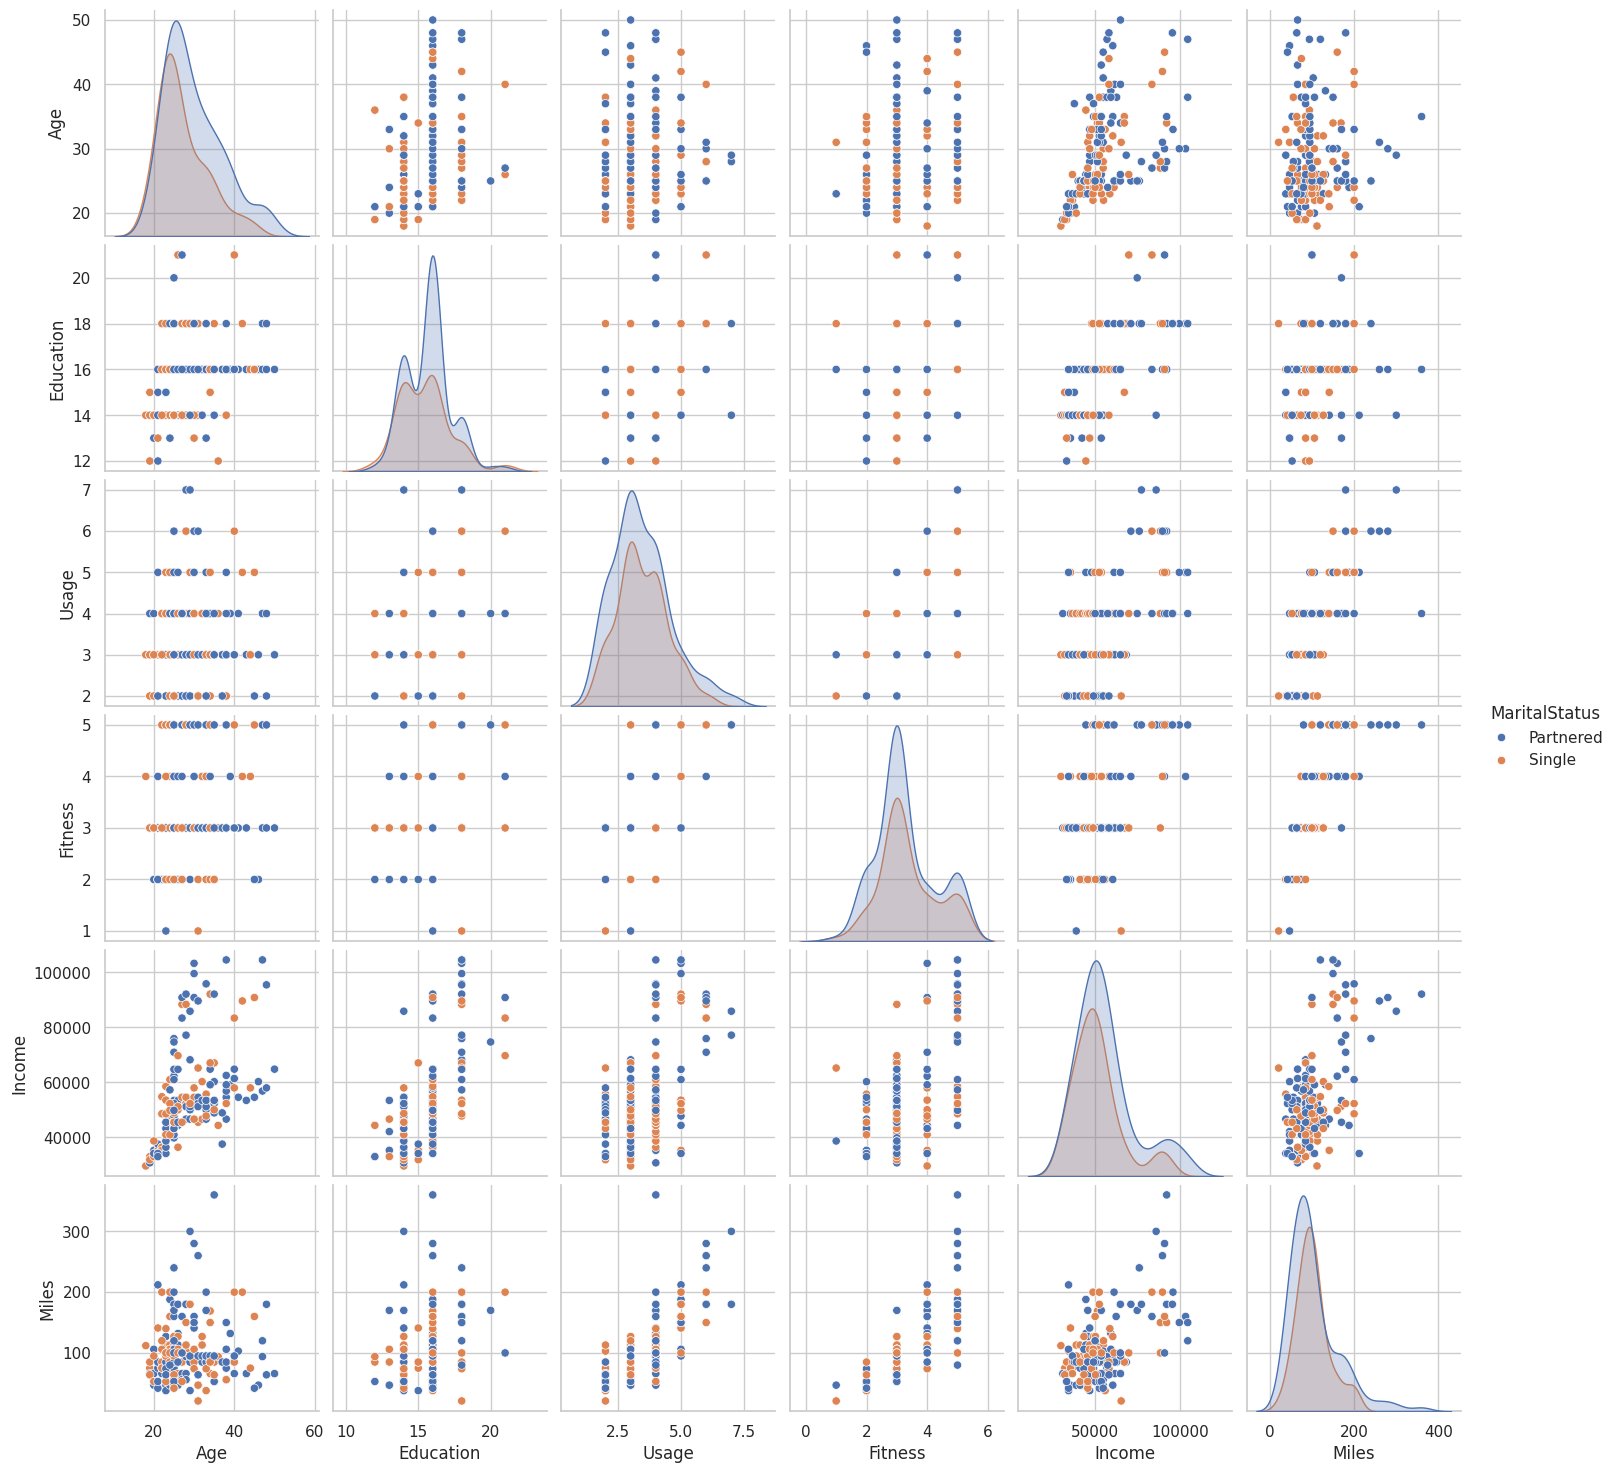

In [99]:
plt.figure(figsize=(15,7))
sns.pairplot(data=dffitness, hue='MaritalStatus')

Several observations can be made regarding the relationships between the variables such as **Age**, **Education**, **Usage**, **Fitness**, **Income**, and **Miles**, separated by the two categories of **MaritalStatus** (Single and Partnered).

Here are some key insights:

1. **Age and Income**:
   - There appears to be a positive correlation between age and income, with older individuals generally earning more. This is reflected in both marital statuses.
   - Partnered individuals tend to have slightly higher incomes compared to single individuals, especially in the middle age range (around 30-40).

2. **Usage and Fitness**:
   - There is a positive relationship between **Usage** (possibly gym usage) and **Fitness** levels. Individuals who use the gym more frequently tend to have higher fitness levels.
   - This trend is consistent for both marital statuses.

3. **Miles and Usage/Fitness**:
   - Individuals who use the gym more frequently also tend to run more miles, which makes sense since higher gym usage likely corresponds with more time spent running or exercising.
   - Similarly, there is a positive relationship between fitness levels and miles run.

4. **Education and Income**:
   - Higher education levels are generally associated with higher incomes. This trend is observable in both single and partnered groups.
   - There are distinct clusters for education, as there may be common education levels such as 12, 16, and 18 years.

5. **Age and Miles**:
   - Younger individuals, especially those around 20-30 years old, tend to run more miles compared to older individuals.
   - Single individuals in this age group appear to run more miles than partnered ones.

6. **Income and Fitness**:
   - Higher-income individuals show a range of fitness levels, though there is no very strong direct correlation between income and fitness.
   - Some high-income individuals have lower fitness levels, and vice versa, suggesting income alone doesn’t determine fitness.

7. **Education and Fitness**:
   - There is no strong relationship between education levels and fitness. People with varying education levels show a similar range of fitness scores.

8. **Distribution of Variables**:
   - Age has a skewed distribution toward younger individuals (20-40 years).
   - Fitness is centered around moderate levels (2-4) for most individuals, but higher fitness levels are achieved by those with more usage.
   - Income distribution shows a wider range for partnered individuals, with some outliers in both marital statuses.
   - Miles run has a highly skewed distribution, with most individuals running fewer than 200 miles.

Overall, the pair plot indicates that **usage**, **fitness**, and **miles** are interrelated, while **age** and **income** show some positive correlation. There are distinctions between the behaviors of single and partnered individuals, with partnered individuals generally earning more but being less active in terms of miles run.